In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from L96 import *
from utils import *
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8,5)
sns.set_style('dark')
sns.set_context('talk')

In [3]:
initX, initY = np.load('./data/initX.npy'), np.load('./data/initY.npy')

In [35]:
l96_tru = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, c=0)  # This will be the NN
l96_tru.iterate(10)

In [36]:
class L96TwoLevelNudge(L96TwoLevel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

In [37]:
l96_nudge = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY)  
# This will be the perfect model

In [38]:
l96_nudge.iterate(10)

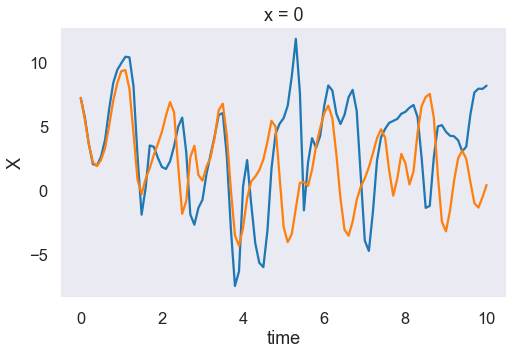

In [39]:
l96_tru.history.X.isel(x=0).plot();
l96_nudge.history.X.isel(x=0).plot();

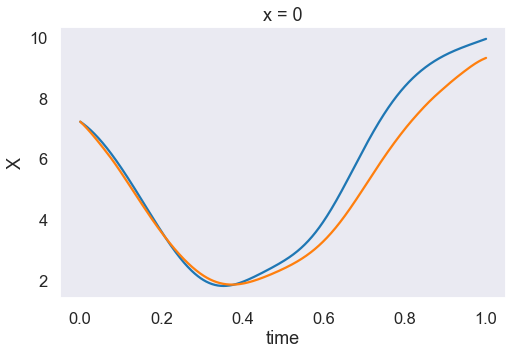

In [75]:
l96_tru = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, c=0, save_dt=0.001)
l96_nudge = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, save_dt=0.001)
for i in range(1000):  # No differences in first step
    l96_tru.step()
    l96_nudge.step()
l96_tru.history.X.isel(x=0).plot();
l96_nudge.history.X.isel(x=0).plot();

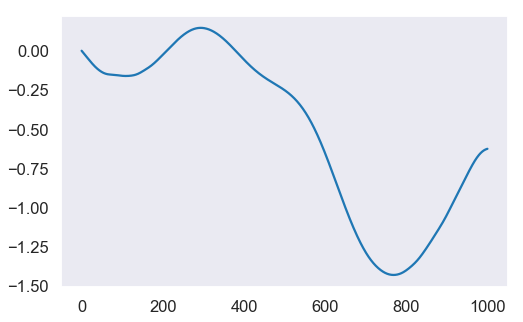

In [76]:
plt.plot((l96_nudge.history.X.isel(x=0) - l96_tru.history.X.isel(x=0)))

In [203]:
l96_tru = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, c=0, save_dt=0.001)
l96_nudge = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, save_dt=0.001)
nudge_history = []
for i in range(100):  # No differences in first step
    diff = l96_nudge.X - l96_tru.X
    l96_nudge.F = 10-diff/0.001/5
    
    for j in range(5):
        nudge_history.append(-diff)
        l96_tru.step()
        l96_nudge.step()
nudge_history = np.array(nudge_history)

In [204]:
nudge_history.shape

(500, 36)

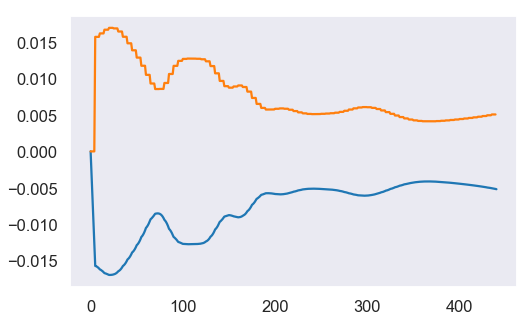

In [205]:
plt.plot((l96_nudge.history.X.isel(x=0) - l96_tru.history.X.isel(x=0))[:-60])
plt.plot(nudge_history[:-60, 0])

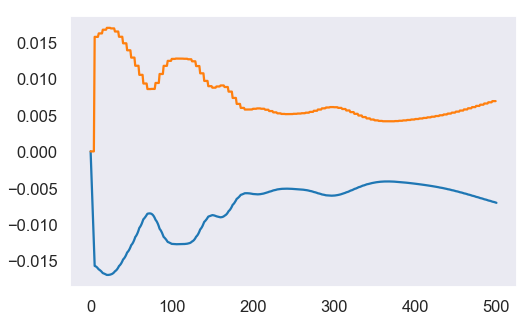

In [206]:
plt.plot((l96_nudge.history.X.isel(x=0) - l96_tru.history.X.isel(x=0)))
plt.plot(nudge_history[:, 0])

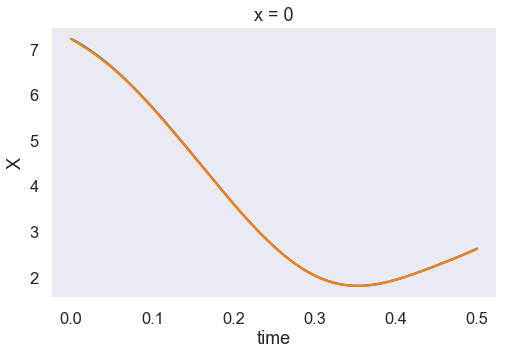

In [207]:
l96_tru.history.X.isel(x=0).plot();
l96_nudge.history.X.isel(x=0).plot();

In [189]:
l96_tru = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, c=0, save_dt=0.001)
l96_nudge = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, save_dt=0.001)
l96_nonudge = L96TwoLevel(integration_type='uncoupled', X_init=initX, Y_init=initY, save_dt=0.001)

In [190]:
l96_tru.step()
l96_nudge.step()
l96_nonudge.step()

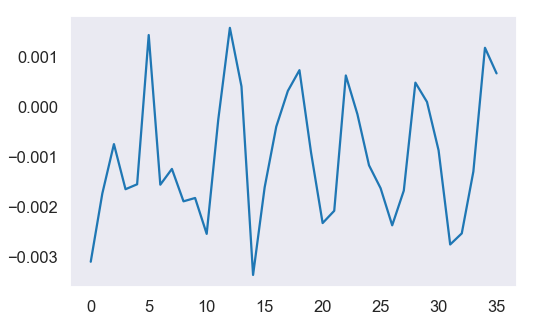

In [191]:
plt.plot(l96_nudge.X - l96_tru.X)

In [196]:
for i in range(4):
    diff = l96_nudge.X - l96_tru.X
    l96_nudge.F = 10-diff/0.001/5
    for i in range(5):
        l96_nudge.step()
        l96_nonudge.step()
        l96_tru.step()

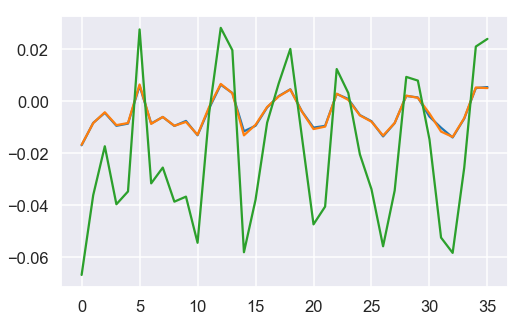

In [193]:
plt.plot(l96_nudge.X - l96_tru.X)
plt.plot(diff)
plt.plot(l96_nonudge.X - l96_tru.X)
#plt.plot(l96_nudge.history.X[1] - l96_nudge.history.X[0])
plt.grid()

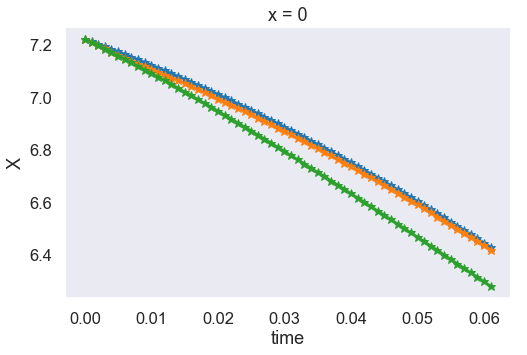

In [197]:
l96_tru.history.X[:,0].plot(marker='*')
l96_nudge.history.X[:,0].plot(marker='*')
l96_nonudge.history.X[:,0].plot(marker='*')

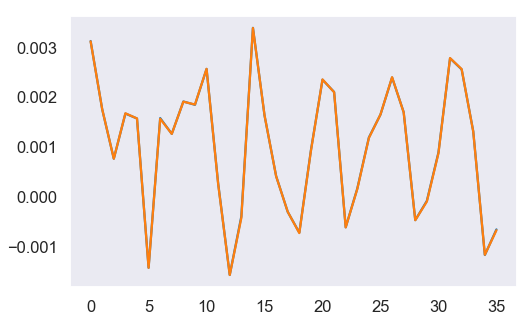

In [168]:
plt.plot(l96_tru.history.X[1] - l96_nudge.history.X[1])
plt.plot(l96_nudge.history.X[2] - l96_nonudge.history.X[2])